In [42]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import v2
import matplotlib.pyplot as plt
from torch import optim
from torch.utils.data import DataLoader
import model as model

In [71]:
transform = v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])
training_data = datasets.MNIST(
    root="data", train=True, download=True, transform=transform
)
training_dataloader = DataLoader(training_data, batch_size=1024, shuffle=False)



In [72]:
images, labels = next(iter(training_dataloader))


In [73]:
images.shape


torch.Size([1024, 1, 28, 28])

In [74]:
labels.shape

torch.Size([1024])

In [75]:
labels

tensor([5, 0, 4,  ..., 3, 7, 7])

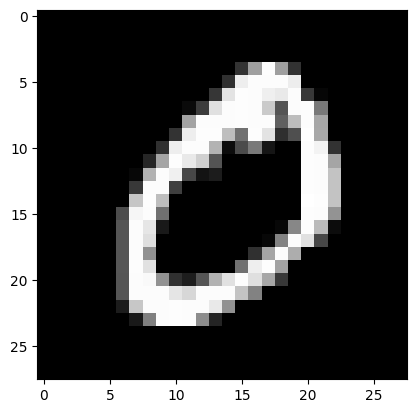

In [76]:
plt.imshow(images[1].reshape(28,28), cmap="gray")
plt.show()

In [77]:
image = images[1]

In [78]:
c, h, w = image.shape

In [79]:
image.shape

torch.Size([1, 28, 28])

In [80]:
patch_size = 14
stride = 14

unfolder = nn.Unfold(kernel_size=patch_size, stride=stride)
patches = unfolder(images)

print(patches.shape)

torch.Size([1024, 196, 4])


In [53]:
patches.shape

torch.Size([64, 196, 4])

In [83]:
rotated = patches.transpose(-2, -1)      # (batch_size, num_patches, patch_size * patch_size)


In [82]:
rotated.shape

torch.Size([64, 4, 196])

In [56]:
linear = nn.Linear(196, 64, bias=False)

In [57]:
result = linear(rotated)

In [58]:
result.shape

torch.Size([64, 4, 64])

In [59]:
rotated[0].shape

torch.Size([4, 196])

In [60]:
loss_fn = nn.CrossEntropyLoss()

In [61]:
patchify = model.Patchify(14, 14, 64)


In [62]:
result.shape

torch.Size([64, 4, 64])

In [63]:
meaned = result.mean(dim=1)

In [64]:
meaned.shape

torch.Size([64, 64])

In [65]:
labels.shape

torch.Size([64])

In [66]:
loss_fn = nn.CrossEntropyLoss()

In [67]:
loss= loss_fn(meaned, labels)

In [68]:
loss.backward()